In [14]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping



In [15]:
data_path= 'data/vente_maillots_de_bain.csv'
dataset = pandas.read_csv(data_path,)

In [16]:
!export KERAS_BACKEND="jax"


In [26]:
scaler = StandardScaler()
normalised_sales = scaler.fit_transform(dataset[["Sales"]]).reshape(1, -1)[0]
def create_dataset(dataset, look_back):
  X, Y = [], []
  for index in range(0, len(dataset)-look_back-1):
    X.append(dataset[index: index + look_back])
    Y.append(dataset[index + look_back])

  return numpy.array(X), numpy.array(Y)
look_back = 3
X, Y = create_dataset(normalised_sales, look_back)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
model = Sequential([
    LSTM(25, input_shape=(look_back, 1)),
    Dense(4)
    ]
)
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2, validation_split=0.2, callbacks=[early_stopping])

/Users/camille/repo/Hetic/repo_M2/NLP/nlp_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 25)             │         2,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,804 (10.95 KB)

 Trainable params: 2,804 (10.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
66/66 - 1s - 12ms/step - loss: 0.6703 - val_loss: 0.2825
Epoch 2/100
66/66 - 0s - 1ms/step - loss: 0.3351 - val_loss: 0.2365
Epoch 3/100
66/66 - 0s - 1ms/step - loss: 0.2107 - val_loss: 0.1868
Epoch 4/100
66/66 - 0s - 1ms/step - loss: 0.1834 - val_loss: 0.1632
Epoch 5/100
66/66 - 0s - 1ms/step - loss: 0.1715 - val_loss: 0.1384
Epoch 6/100
66/66 - 0s - 1ms/step - loss: 0.1635 - val_loss: 0.1268
Epoch 7/100
66/66 - 0s - 1ms/step - loss: 0.1590 - val_loss: 0.1177
Epoch 8/100
66/66 - 0s - 1ms/step - loss: 0.1511 - val_loss: 0.1115
Epoch 9/100
66/66 - 0s - 1ms/step - loss: 0.1485 - val_loss: 0.1079
Epoch 10/100
66/66 - 0s - 1ms/step - loss: 0.1472 - val_loss: 0.1048
Epoch 11/100
66/66 - 0s - 1ms/step - loss: 0.1418 - val_loss: 0.1017
Epoch 12/100
66/66 - 0s - 1ms/step - loss: 0.1368 - val_loss: 0.1006
Epoch 13/100
66/66 - 0s - 1ms/step - loss: 0.1327 - val_loss: 0.0980
Epoch 14/100
66/66 - 0s - 1ms/step - loss: 0.1321 - val_loss: 0.0954
Epoch 15/100
66/66 - 0s - 1ms/step - loss:

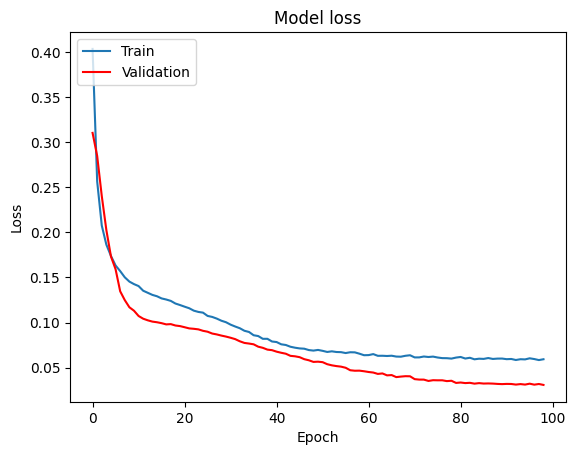

In [18]:
plt.plot(model.history.history["loss"][1:])
plt.plot(model.history.history["val_loss"][1:], 'r')
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [19]:
test_predicted = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


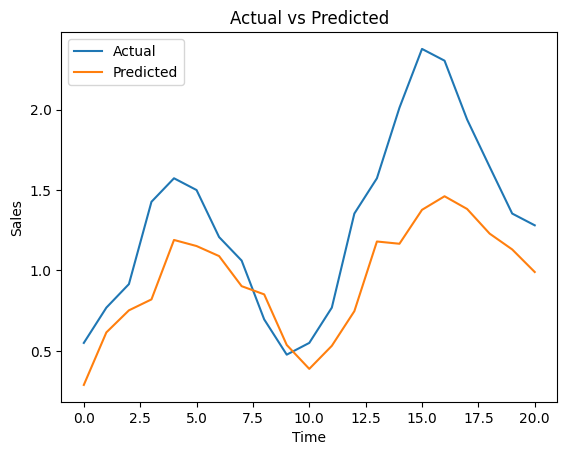

In [20]:
plt.plot(Y_test, label='Actual')
plt.plot(test_predicted, label='Predicted')
plt.title('Actual vs Predicted')
plt.ylabel('Sales')
plt.xlabel('Time')
plt.legend()
plt.show()

In [21]:
mean_squared_error = numpy.mean(numpy.square(Y_test - test_predicted))/len(Y_test)
print(mean_squared_error)

0.02574354490748259


Un LTSM
8 matrices de regression 
4 rembember gates
2 output gates

doc de word index 